<a href="https://colab.research.google.com/github/PPatrickGU/ROB311/blob/master/TP6_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROB311 TP6** 

### **Implementation of the algorithm of K-means to identify the handwriting number** 

*Author: Yan CHEN & Dajing GU*

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import  rgb2hex
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### **Useful function**

In [116]:
def data_loading(path):
    dataset = pd.read_csv(path,header=None)
    data = dataset.iloc[:, 0:-1]
    label = dataset.iloc[:, -1]
    return data, label

def plot_result(data, data_label_pred, centers, title):
  plt.figure(figsize=(12, 8))
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'] 
  for i, color in enumerate(colors):
    need_idx = np.where(data_label_pred==i)[0]
    plt.scatter(data[need_idx,1],data[need_idx,0], c=color, label= i)

  for i in range(10):
    plt.scatter(centers[i,1], centers[i,0], c='k', marker = '+', s = 100)  

  plt.legend(loc='upper right')
  plt.title(title)
  plt.show()

### **Data loading**

In [110]:
train_path = "./optdigits.tra"
test_path = "./optdigits.tes"
train_data, train_label = data_loading(train_path)
test_data, test_label = data_loading(test_path)

### **I）A simple implementation of the algorithm**


**Training the model with the training data**







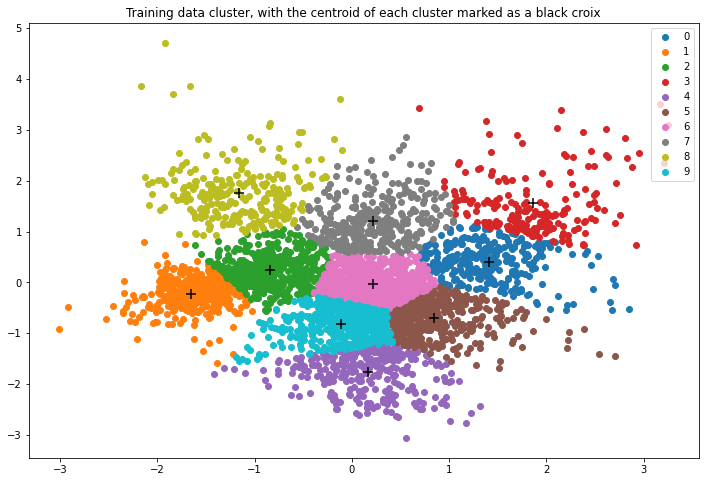

In [117]:
train_data_scaled = StandardScaler().fit_transform(train_data)
pca = PCA(n_components=2, svd_solver='auto', whiten = True)
pca.fit(train_data_scaled)
train_data_PCA = pca.transform(train_data_scaled)
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data_PCA)
train_labels = kmeans.labels_
centers = kmeans.cluster_centers_

plot_result(train_data_PCA, train_labels, centers, 'Training data cluster, with the centroid of each cluster marked as a black croix')


**Classify the test data the model trained**

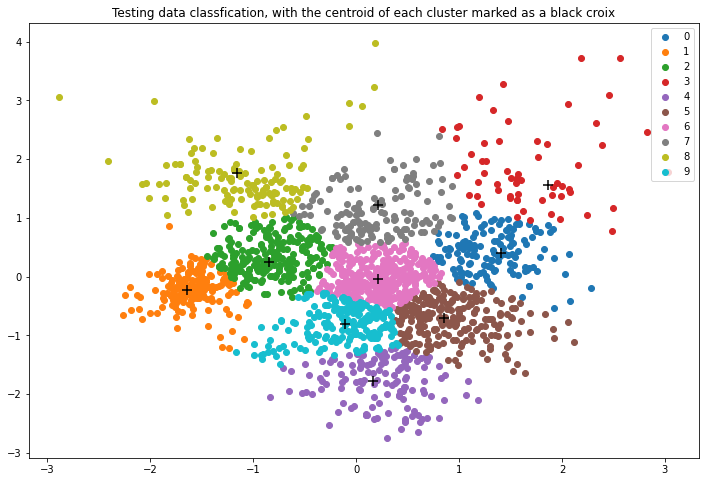

In [118]:
test_data_scaled = StandardScaler().fit_transform(test_data)
test_data_PCA = pca.transform(test_data_scaled)
test_label_pred = kmeans.predict(test_data_PCA)
plot_result(test_data_PCA, test_label_pred, centers, 'Testing data classfication, with the centroid of each cluster marked as a black croix')

In [ ]:
pca = PCA(n_components = 'mle', svd_solver='full', whiten = True)
pca.fit(train_data)
train_data_PCA = pca.transform(train_data)
test_data_PCA = pca.transform(test_data)

kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data_PCA)
kmeans.labels_
prediction = kmeans.predict(test_data_PCA)
